### 3. BMI 예측 회귀문제 딥러닝(상관관계 표시 포함, 보스턴 집값 참조)

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df['BMI'].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 248, dtype: int64

In [5]:
X=df.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1


In [ ]:
y=df['BMI']
print("BMI 통계:")
print(f"평균: {y.mean():.2f}")
print(f"표준편차: {y.std():.2f}")
print(f"최솟값: {y.min():.2f}")
print(f"최댓값: {y.max():.2f}")
print(f"\nBMI 분포 (상위 10개):")
print(y.value_counts().head(10))

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 248, dtype: int64

In [ ]:
# BMI는 회귀 문제이므로 원핫인코딩이 아닌 그대로 사용
Y = y.values.reshape(-1, 1)  # 2D 배열로 변환 (회귀 문제용)
print(f"Y shape: {Y.shape}")
print(f"Y 샘플: {Y[:5].flatten()}")

In [8]:
X = X.values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [ ]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 248), (154, 248))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

print("정규화 후 데이터 형태:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"y_train_scaled: {y_train_scaled.shape}")


정규화 후 데이터 형태:
X_train_scaled: (614, 8)
y_train_scaled: (614, 248)


In [12]:
# BMI 예측을 위한 회귀 모델
model = Sequential()

model.add(Dense(16, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # 회귀 문제: 1개 출력, linear 활성화

# 회귀 문제에 맞는 손실함수와 메트릭
model.compile(optimizer='adam', 
              loss='mse',  # Mean Squared Error
              metrics=['mae'])  # Mean Absolute Error

model.summary()

c:\Users\luili\OneDrive\Desktop\개인폴더\Coding_Study\Machine_Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9883 - mae: 0.2475 - val_loss: 0.8892 - val_mae: 0.1647
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9588 - mae: 0.1421 - val_loss: 0.8745 - val_mae: 0.1432
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9495 - mae: 0.1436 - val_loss: 0.8713 - val_mae: 0.1412
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9474 - mae: 0.1298 - val_loss: 0.8694 - val_mae: 0.1263
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9464 - mae: 0.1241 - val_loss: 0.8685 - val_mae: 0.1281
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9458 - mae: 0.1243 - val_loss: 0.8678 - val_mae: 0.1238
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9453 - mae: 0.1210 - val_loss: 0.8674 - val_mae: 0.1232
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9450 - mae: 0.1241 - val_loss: 0.8670 - val_mae: 0.1213
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.94

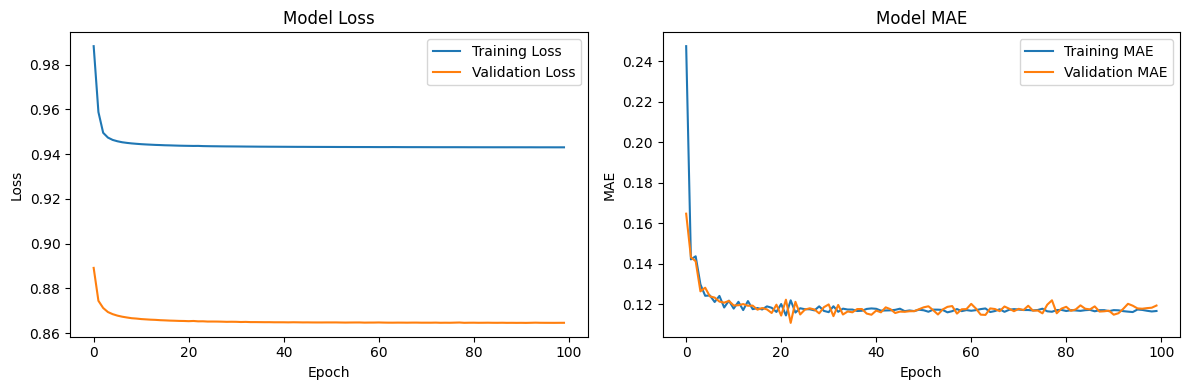

In [13]:
# 모델 훈련
history = model.fit(X_train_scaled, y_train_scaled, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2,
                    verbose=1)

# 훈련 히스토리 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


BMI와의 상관관계 (내림차순):
BMI                         1.000000
SkinThickness               0.392573
Outcome                     0.292695
BloodPressure               0.281805
Glucose                     0.221071
Insulin                     0.197859
DiabetesPedigreeFunction    0.140647
Age                         0.036242
Pregnancies                 0.017683
Name: BMI, dtype: float64


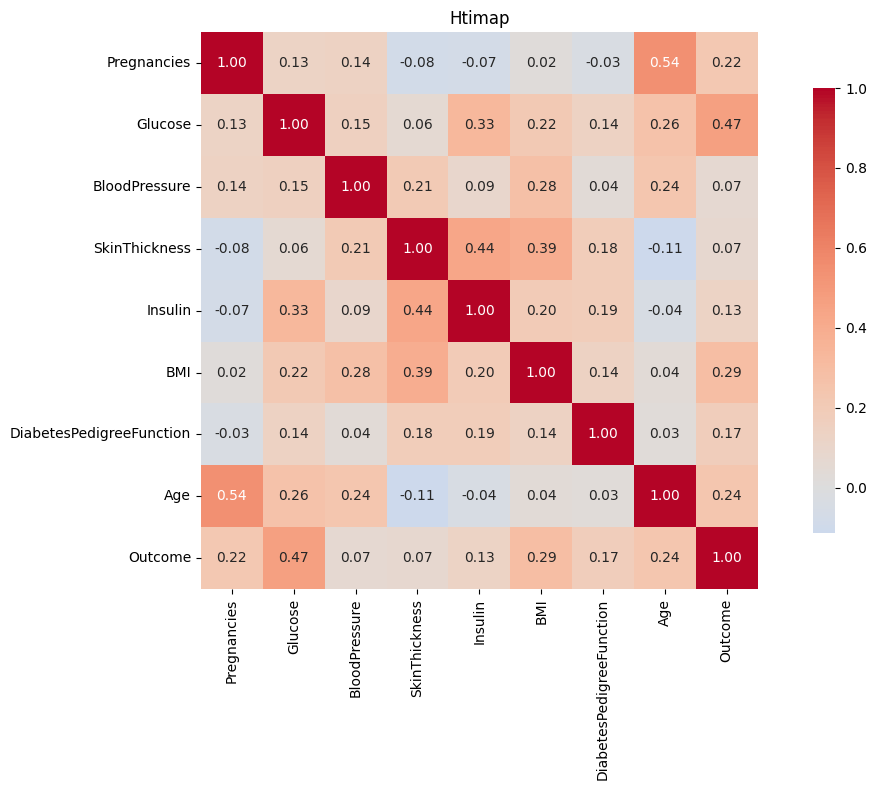

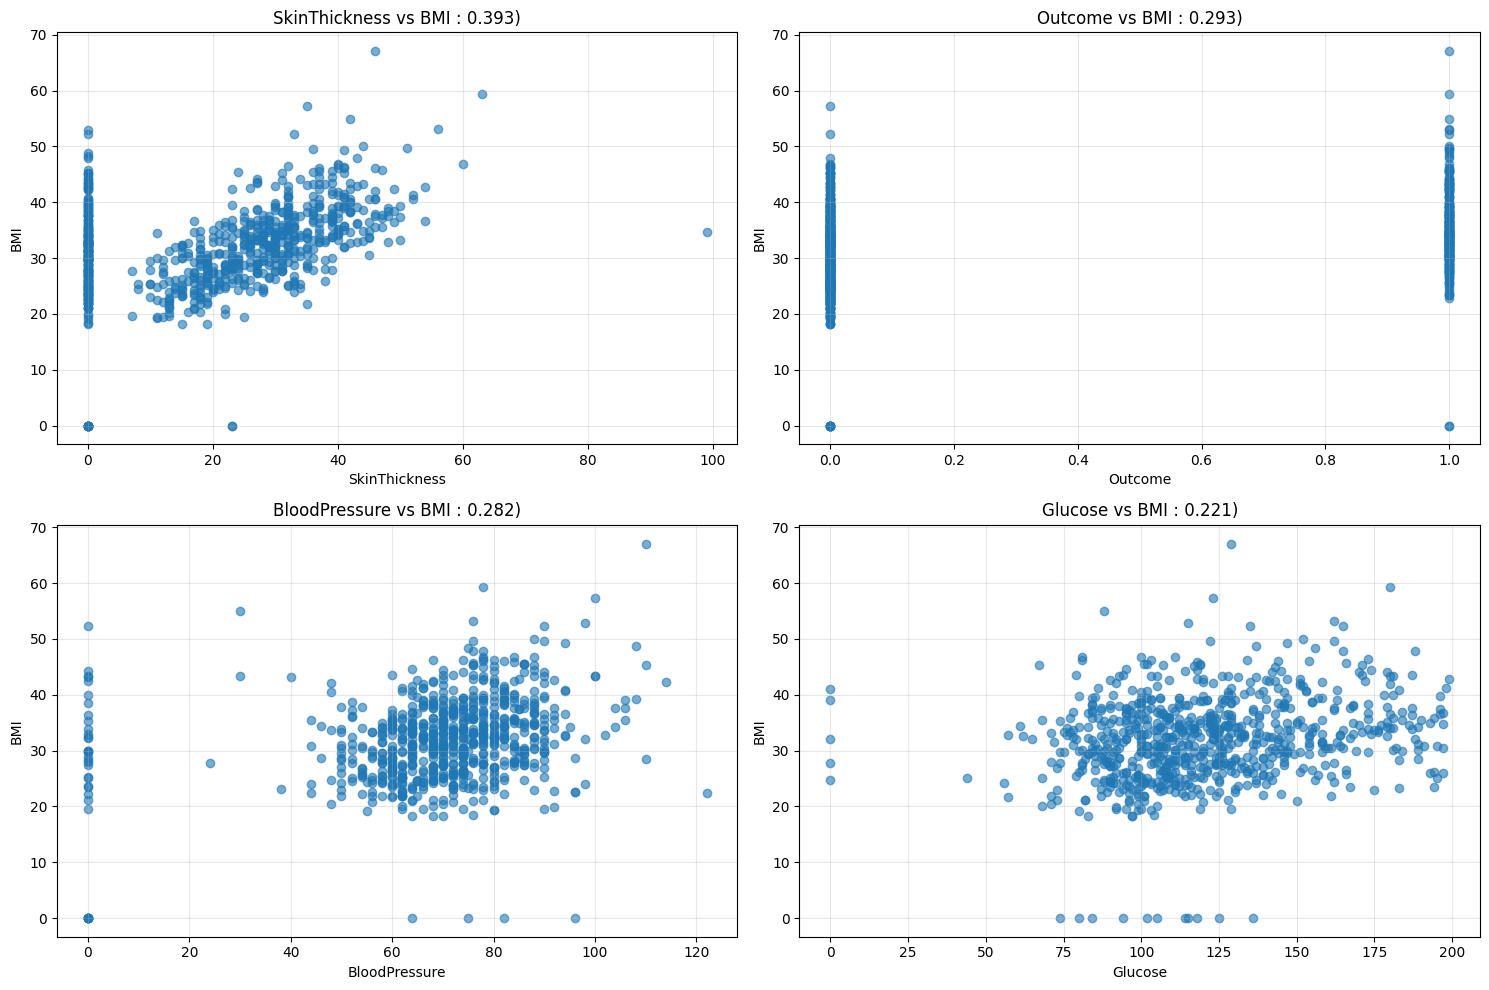

In [16]:
# 상관관계 분석 (보스턴 집값 참조)
import seaborn as sns

# 전체 데이터셋으로 상관관계 분석
df_corr = df.copy()
correlation_matrix = df_corr.corr()

# BMI와 다른 변수들의 상관관계
bmi_corr = correlation_matrix['BMI'].sort_values(ascending=False)
print("BMI와의 상관관계 (내림차순):")
print(bmi_corr)

# 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Htimap')
plt.tight_layout()
plt.show()

# BMI와 가장 상관관계가 높은 변수들 시각화
top_corr_features = bmi_corr.drop('BMI').head(4).index

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_corr_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[feature], df['BMI'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('BMI')
    plt.title(f'{feature} vs BMI : {bmi_corr[feature]:.3f})')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
